In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def make_distibution_tukey(m, sigma_x, sigma_y, delta, n):
    X = np.random.normal(m,sigma_x, n)
    Y = np.random.normal(m,sigma_y, n)
    Z = np.random.uniform(0,1,n)
    U = np.array([x if z > delta else y for x,y,z in zip(X, Y, Z) ])
    return U


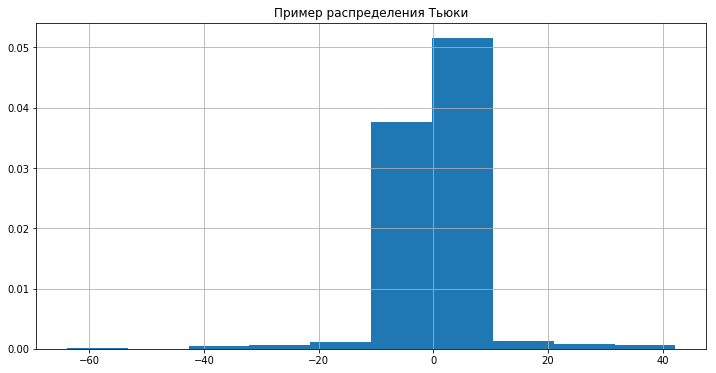

In [3]:
U = make_distibution_tukey(0, 1, 20, 0.1, 1000)
plt.figure(figsize=(12,6))
plt.hist(U, density=True)
plt.title('Пример распределения Тьюки')
plt.grid()

## Подсчёт ошибок 2-го рода
### Один параметр меняется остальные const

In [4]:
def plot_errors(errors_student, errors_wilcoxon, param, xlabel):
    fig = plt.figure(figsize=(17, 7))
    plt.grid() 
    plt.title('Beta error frequency')
    plt.plot(param, errors_student, color='green',label='Критерий Стьюдена')
    plt.plot(param, errors_wilcoxon, color='red',label='Критерий Вилкоксона')
    plt.xlabel(xlabel)
    plt.ylabel('freq')
    plt.legend()
    plt.grid(True) 
    plt.show()

In [5]:
def calc_error_frequency(test ,theta, sigma1, sigma2, delta, n, alpha, num_experiments):
    test_res = []
    for i in range(num_experiments):
        X =  make_distibution_tukey(0, sigma1, sigma2, delta,  n)
        Y =  make_distibution_tukey(theta, sigma1, sigma2, delta, n) 
        p_value_test = test(X,Y)[1]
        test_res.append( p_value_test <= alpha )
    errors_res_freq = (len(test_res) - sum(test_res)) / len(test_res)
    return errors_res_freq
        

### $\sigma_2$

In [9]:
num_experiments = 500
n = 200
alpha = 0.05
theta = 3
delta = 0.1
sigma1 = 1
sigma2_list = range(10, 30)

errors_student_test_frequency = [
        calc_error_frequency(
            stats.ttest_ind, 
            theta, 
            sigma1, 
            sigma2, 
            delta, 
            n, 
            alpha, 
            num_experiments
        ) for sigma2 in sigma2_list
]
errors_wilcoxon_test_frequency  = [
    calc_error_frequency(
        stats.wilcoxon, 
        theta, 
        sigma1, 
        sigma2, 
        delta, 
        n, 
        alpha, 
        num_experiments
    ) for sigma2 in sigma2_list
]

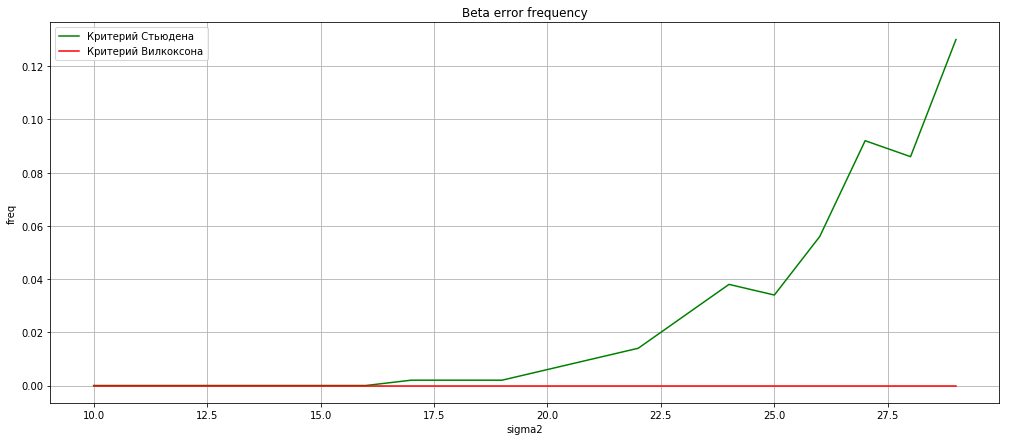

In [10]:
plot_errors(errors_student_test_frequency, errors_wilcoxon_test_frequency, sigma2_list,'sigma2')

### $\delta$

In [11]:
num_experiments = 500
n = 200
alpha = 0.05
theta = 3
delta_list = np.arange(0, 1, 0.025)
sigma1 = 1
sigma2 = 10

errors_student_test_frequency = [
        calc_error_frequency(
            stats.ttest_ind, 
            theta, 
            sigma1, 
            sigma2, 
            delta, 
            n, 
            alpha, 
            num_experiments
        ) for delta in delta_list
]
errors_wilcoxon_test_frequency  = [
    calc_error_frequency(
        stats.wilcoxon, 
        theta, 
        sigma1, 
        sigma2, 
        delta, 
        n, 
        alpha, 
        num_experiments
    ) for delta in delta_list
]

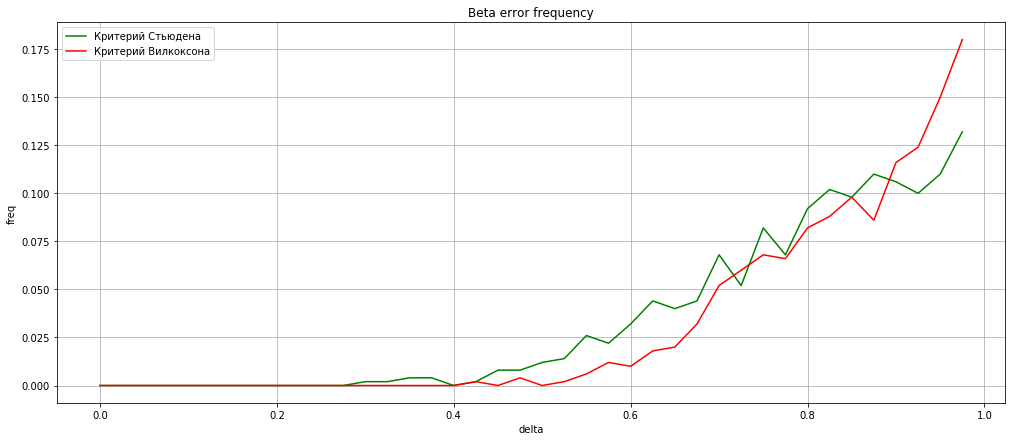

In [12]:
plot_errors(errors_student_test_frequency, errors_wilcoxon_test_frequency, delta_list,'delta')

### $\theta$


In [13]:
num_experiments = 500
n = 200
alpha = 0.05
theta_list = np.arange(0, 3.1, 0.1)
delta = 0.1
sigma1 = 1
sigma2 = 10

errors_student_test_frequency = [
        calc_error_frequency(
            stats.ttest_ind, 
            theta, 
            sigma1, 
            sigma2, 
            delta, 
            n, 
            alpha, 
            num_experiments
        ) for theta in theta_list
]
errors_wilcoxon_test_frequency  = [
    calc_error_frequency(
        stats.wilcoxon, 
        theta, 
        sigma1, 
        sigma2, 
        delta, 
        n, 
        alpha, 
        num_experiments
    ) for theta in theta_list
]

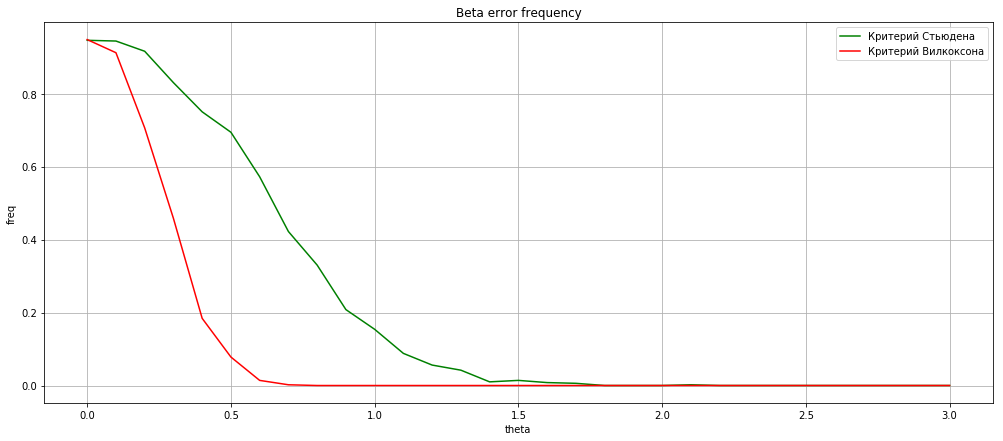

In [14]:
plot_errors(errors_student_test_frequency, errors_wilcoxon_test_frequency, theta_list,'theta')